<a href="https://colab.research.google.com/github/Alexander-1380/Code-part-for-mob-app/blob/main/%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_xls%2C_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D1%8C_%D0%B2_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка результатов тестирования из XLS-файла, запись обработки в PDF-фйлы (Данный проект выполнялся для стартапа в качестве участка кода для мобильного приложения).

Согласно ТЗ  Задача:
1. Написать код программы на языке Python.

2. На вход программы подаются результаты тестирования в xls-файле. Каждая строка таблицы - ответы одного участника.

3. Программа обрабатывает для каждого участника теста его результаты по следующим правилам:

  3.1. Ответы на вопросы №№ 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 37, 40, 41, 42, 43, 45, 46, 47, 48, 50 необходимо обрабатывать согласно правилу:

  - 'Совершенно неверно' - 1
  - 'Не совсем верно' - 2
  - 'Ни верно, ни неверно' - 3
  - 'Отчасти верно' - 4
  - 'Совершенно верно' - 5

  3.2. Ответы на вопросы №№ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20,  22, 24, 26, 28, 29, 30,32, 34, 36, 38, 39, 44, 49 необходимо обрабатывать с инверсией:

  - 'Совершенно неверно' - 5
  - 'Не совсем верно' - 4
  - 'Ни верно, ни неверно' - 3
  - 'Отчасти верно' - 2
  - 'Совершенно верно' - 1

  3.3. Считает для каждого участника теста на основе его ответов следующие характеристики по правилам:

  - EXTR - среднее значение ответов на вопросы №№ 1, 6, 11, 16, 21, 26, 31, 36, 41, 46
  - AGRB - среднее значение ответов на вопросы №№ 2, 7, 12, 17,  22, 27,  32, 37, 42, 47
  - OPEN - среднее значение ответов на вопросы №№ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50
  - NEW1 - среднее значение ответов на вопросы №№ 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20
  - NEW2 - среднее значение ответов на вопросы №№ 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30

  3.4. Для каждого участника формирует его результаты в pdf-файл, файл должен содержать:
  - значения рассчитанных характеристик
  - графическое представление характеристик
  - логотип проекта (изменен)
  - выводы к каждому результату переменной (изменено на общие фразы)

4. Файлы направить заказчику.

In [1]:
# загружаем нужные библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
from google.colab import drive

from matplotlib.backends.backend_pdf import PdfPages
import urllib.request
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from PIL import Image

In [7]:
# подключим гугл-диск
drive.mount('/content/drive')

# путь к файлу с сырыми данными на моем гугл-диске (доступ открыт для всех)
file_path = f"/content/drive/My Drive/Colab Notebooks/GitHub/Apply/Test_results_exp.xlsx"

# загружаем данные
dataframe = pd.read_excel(file_path, header=[0,1])

# выводим датафрейм
display(dataframe)

# display(dataframe.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#                  №       Пользователь                 IP  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
0                  1             569016  Имя пользователя1      176.228.10.46   
1                  2             569016  Имя пользователя2      176.228.10.46   

      Дата завершения  Потрачено времени LIFE FACTS                        \
   Unnamed: 4_level_1 Unnamed: 5_level_1  Результат Вопрос № 1 Вопрос № 2   
0 2023-04-08 20:44:00           00:23:13          0          1          М   
1 2023-04-08 20:44:00           00:23:13          0          1          М   

                                                    IPIP50  \
  Вопрос № 3 Вопрос № 4 Спасибо за участие в тестировании!   
0      30-39          9                                  0   
1      30-39          9                                  0   

                                                               \
           Вопрос № 1            Вопрос № 2        Вопрос № 3   
0  Совершенно неверно  Ни верно, ни неверно  Совершенно верно   
1  Совершенно неверно                     1                 4   

                                                                               \
         Вопрос № 4        Вопрос № 5        Вопрос № 6            Вопрос № 7   
0  Совершенно верно  Совершенно верно  Совершенно верно  Ни верно, ни неверно   
1                 4                 5  Совершенно верно  Ни верно, ни неверно   

                                                               \
           Вопрос № 8          Вопрос № 9         Вопрос № 10   
0  Совершенно неверно  Совершенно неверно  Совершенно неверно   
1                   3  Совершенно неверно                   3   

                                                               \
          Вопрос № 11           Вопрос № 12       Вопрос № 13   
0  Совершенно неверно  Ни верно, ни неверно  Совершенно верно   
1  Совершенно неверно                     2  Совершенно верно   

                                                                               \
        Вопрос № 14       Вопрос № 15       Вопрос № 16           Вопрос № 17   
0  Совершенно верно  Совершенно верно  Совершенно верно  Ни верно, ни неверно   
1                 5  Совершенно верно                 1  Ни верно, ни неверно   

                                                               \
          Вопрос № 18         Вопрос № 19         Вопрос № 20   
0  Совершенно неверно  Совершенно неверно  Совершенно неверно   
1                   2  Совершенно неверно                   3   

                                                               \
          Вопрос № 21           Вопрос № 22       Вопрос № 23   
0  Совершенно неверно  Ни верно, ни неверно  Совершенно верно   
1  Совершенно неверно                     4  Совершенно верно   

                                                                               \
        Вопрос № 24       Вопрос № 25       Вопрос № 26           Вопрос № 27   
0  Совершенно верно  Совершенно верно  Совершенно верно  Ни верно, ни неверно   
1                 4  Совершенно верно  Совершенно верно                     1   

                                                             \
          Вопрос № 28       Вопрос № 29         Вопрос № 30   
0  Совершенно неверно  Совершенно верно  Совершенно неверно   
1  Совершенно неверно                 2  Совершенно неверно   

                                                               \
          Вопрос № 31           Вопрос № 32       Вопрос № 33   
0  Совершенно неверно  Ни верно, ни неверно  Совершенно верно   
1  Совершенно неверно  Ни верно, ни неверно                 5   

                                                                               \
        Вопрос № 34       Вопрос № 35       Вопрос № 36           Вопрос № 37   
0  Совершенно верно  Совершенно верно  Совершенно верно  Ни верно, ни неверно   
1  Совершенно верно                 4  Совершенно верно  Ни верно, ни неверно   

                 

In [8]:
# Переименуем названия столбцов


# зададим функцию с правилами переименования
def ren(lst):
  result = []
  for i in lst:
    if 'Пользователь' in i[0]:
      result.append('user_name')
    elif 'Unnamed' in i[1]:
      result.append(i[0])
    elif 'LIFE FACTS' in i[0]:
      if 'Вопрос' in i[1]:
        parts = i[1].split()
        result.append(f'Вопрос № 1.{parts[-1]}')
      else:
        result.append(i[0]+' '+i[1])
    elif 'IPIP50' in i[0]:
      if 'Вопрос' in i[1]:
        parts = i[1].split()
        result.append(f'Вопрос № 2.{parts[-1]}')
      else:
        result.append(i[0]+' '+i[1])
    elif 'FACE' in i[0]:
      if 'Вопрос' in i[1]:
        parts = i[1].split()
        result.append(f'Вопрос № 3.{parts[-1]}')
      else:
        result.append(i[0]+' '+i[1])
    else:
      result.append(i)
  return result

# применяем функцию на список текущих названий
name_list = list(dataframe)
dataframe.columns= ren(name_list)
#dataframe.columns

In [9]:
# !это поле заполняется по условию от заказчика

# в списке question_list необходимо записать номера вопросов, ответы на которые
# будем переводить в числовые значения без инверсии
question_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 31, 33, 35,
                 37, 40, 41, 42, 43, 45, 46, 47, 48, 50]

# в списке inv_question_list необходимо записать номера вопросов, ответы на которые
#будем переводить в числовые значения c инверсией
inv_question_list = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 29, 30,
                     32, 34, 36, 38, 39, 44, 49]


# здесь задаем логику расчета переменных для характеристик.
# нужные переменные:
# EXTR - среднее значение ответов на вопросы №№ 1, 6, 11, 16, 21, 26, 31, 36, 41, 46
# AGRB - среднее значение ответов на вопросы №№ 2, 7, 12, 17,  22, 27,  32, 37, 42, 47
# OPEN - среднее значение ответов на вопросы №№ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50
# NEW1 - среднее значение ответов на вопросы №№ 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20
# NEW2 - среднее значение ответов на вопросы №№ 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30
# в список qestions_for_EXTR запишем номера вопросов для расчета переменной EXTR
qestions_for_EXTR = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]

# в список qestions_for_AGRB запишем номера вопросов для расчета переменной AGRB
qestions_for_AGRB = [2, 7, 12, 17, 22, 27, 32, 37, 42, 47]

# в список qestions_for_AGRB запишем номера вопросов для расчета переменной OPEN
qestions_for_OPEN = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# в список qestions_for_NEW1 запишем номера вопросов для расчета переменной NEW1
qestions_for_NEW1 = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# в список qestions_for_NEW2 запишем номера вопросов для расчета переменной NEW2
qestions_for_NEW2 = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


# задаем функцию логики выдачи текста в список внесем текст для выдачи.
# Таких функций будет по числу выдаваемых характеристик.
def textify(avg_N):
  text_list_1 = ['''На сегодняшний день ваше самочувствие может быть ниже,
чем в среднем в вашей выборке (сходной по полу, возрасту, уровню образования, роду занятий)''',
               'Средние показатели',
               'У вас дела лучше, чем у многих']
  if 1 <= avg_N <= 3:
    return text_list_1[0]
  elif 3 < avg_N <= 3.9:
    return text_list_1[1]
  elif avg_N > 3.9:
    return text_list_1[2]

In [10]:
# заменяем текстовые ответы на числовые


# задаем функцию переименования без инверсии
def change_straight(answer):
    try:
        if 'Совершенно неверно' in answer:
          return 1
        elif 'Не совсем верно' in answer:
          return 2
        elif 'Ни верно, ни неверно' in answer:
          return 3
        elif 'Отчасти верно' in answer:
          return 4
        elif 'Совершенно верно' in answer:
          return 5
        else:
          return 'error'
    except:
        return answer


# задаем функцию переименования c инверсией
def change_inverse(answer):
    try:
        if 'Совершенно неверно' in answer:
          return 5
        elif 'Не совсем верно' in answer:
          return 4
        elif 'Ни верно, ни неверно' in answer:
          return 3
        elif 'Отчасти верно' in answer:
          return 2
        elif 'Совершенно верно' in answer:
          return 1
        else:
          return 'error'
    except:
        return answer


# зададим общую функцию для замены
def change(df, q_list, inv_q_list):
  for i in range(1, len(q_list)+len(inv_q_list)+1):
    if i in q_list:
      df[f'Вопрос № 2.{i}'] = df[f'Вопрос № 2.{i}'].apply(change_straight)
    elif i in inv_q_list:
      df[f'Вопрос № 2.{i}'] = df[f'Вопрос № 2.{i}'].apply(change_inverse)


# применяем функцию
pd.set_option('display.max_columns', None)
change(dataframe, question_list, inv_question_list)
display(dataframe)
#pd.reset_option('display.max_columns')

,#,№,user_name,IP,Дата завершения,Потрачено времени,LIFE FACTS Результат,Вопрос № 1.1,Вопрос № 1.2,Вопрос № 1.3,Вопрос № 1.4,IPIP50 Спасибо за участие в тестировании!,Вопрос № 2.1,Вопрос № 2.2,Вопрос № 2.3,Вопрос № 2.4,Вопрос № 2.5,Вопрос № 2.6,Вопрос № 2.7,Вопрос № 2.8,Вопрос № 2.9,Вопрос № 2.10,Вопрос № 2.11,Вопрос № 2.12,Вопрос № 2.13,Вопрос № 2.14,Вопрос № 2.15,Вопрос № 2.16,Вопрос № 2.17,Вопрос № 2.18,Вопрос № 2.19,Вопрос № 2.20,Вопрос № 2.21,Вопрос № 2.22,Вопрос № 2.23,Вопрос № 2.24,Вопрос № 2.25,Вопрос № 2.26,Вопрос № 2.27,Вопрос № 2.28,Вопрос № 2.29,Вопрос № 2.30,Вопрос № 2.31,Вопрос № 2.32,Вопрос № 2.33,Вопрос № 2.34,Вопрос № 2.35,Вопрос № 2.36,Вопрос № 2.37,Вопрос № 2.38,Вопрос № 2.39,Вопрос № 2.40,Вопрос № 2.41,Вопрос № 2.42,Вопрос № 2.43,Вопрос № 2.44,Вопрос № 2.45,Вопрос № 2.46,Вопрос № 2.47,Вопрос № 2.48,Вопрос № 2.49,Вопрос № 2.50,FACE Результат,Вопрос № 3.1,Вопрос № 3.2,Вопрос № 3.3,Вопрос № 3.4,Вопрос № 3.5,Вопрос № 3.6,Вопрос № 3.7,Вопрос № 3.8,Вопрос № 3.9,Вопрос № 3.10,Вопрос № 3.11,Вопрос № 3.12,Вопрос № 3.13,Вопрос № 3.14,Вопрос № 3.15,Вопрос № 3.16,Вопрос № 3.17,Вопрос № 3.18
0,1,569016,Имя пользователя1,176.228.10.46,2023-04-08 20:44:00,00:23:13,0,1,М,30-39,9,0,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,0,Уйти от взаимодействия,Уйти от взаимодействия,Атаковать,Предложить дружбу,Атаковать,Атаковать,Атаковать,Атаковать,Атаковать,Атаковать,Уйти от взаимодействия,Предложить дружбу,Атаковать,Атаковать,Уйти от взаимодействия,Атаковать,Атаковать,Атаковать
1,2,569016,Имя пользователя2,176.228.10.46,2023-04-08 20:44:00,00:23:13,0,1,М,30-39,9,0,1,1,4,4,5,1,3,3,1,3,1,2,5,5,5,1,3,2,1,3,1,4,5,4,5,1,1,5,2,5,1,3,5,1,4,1,3,3,2,5,1,3,5,1,2,4,3,5,1,5,0,Уйти от взаимодействия,Атаковать,Атаковать,Атаковать,Атаковать,Атаковать,Предложить дружбу,Атаковать,Предложить дружбу,Атаковать,Уйти от взаимодействия,Предложить дружбу,Уйти от взаимодействия,Атаковать,Уйти от взаимодействия,Атаковать,Предложить дружбу,Предложить дружбу


In [11]:
# считаем значения переменных avg_N

list_avg_1 = []
for i in qestions_for_EXTR:
  list_avg_1.append(f'Вопрос № 2.{i}')
print(list_avg_1)

list_avg_2 = []
for i in qestions_for_AGRB:
  list_avg_2.append(f'Вопрос № 2.{i}')

list_avg_3 = []
for i in qestions_for_OPEN:
  list_avg_3.append(f'Вопрос № 2.{i}')

list_avg_4 = []
for i in qestions_for_NEW1:
  list_avg_4.append(f'Вопрос № 2.{i}')

list_avg_5 = []
for i in qestions_for_NEW2:
  list_avg_5.append(f'Вопрос № 2.{i}')

dataframe['EXTR'] = round(dataframe[list_avg_1].mean(axis=1), 1)
dataframe['AGRB'] = round(dataframe[list_avg_2].mean(axis=1), 1)
dataframe['OPEN'] = round(dataframe[list_avg_3].mean(axis=1), 1)
dataframe['NEW1'] = round(dataframe[list_avg_4].mean(axis=1), 1)
dataframe['NEW2'] = round(dataframe[list_avg_5].mean(axis=1), 1)
dataframe


['Вопрос № 2.1', 'Вопрос № 2.6', 'Вопрос № 2.11', 'Вопрос № 2.16', 'Вопрос № 2.21', 'Вопрос № 2.26', 'Вопрос № 2.31', 'Вопрос № 2.36', 'Вопрос № 2.41', 'Вопрос № 2.46']


,#,№,user_name,IP,Дата завершения,Потрачено времени,LIFE FACTS Результат,Вопрос № 1.1,Вопрос № 1.2,Вопрос № 1.3,Вопрос № 1.4,IPIP50 Спасибо за участие в тестировании!,Вопрос № 2.1,Вопрос № 2.2,Вопрос № 2.3,Вопрос № 2.4,Вопрос № 2.5,Вопрос № 2.6,Вопрос № 2.7,Вопрос № 2.8,Вопрос № 2.9,Вопрос № 2.10,Вопрос № 2.11,Вопрос № 2.12,Вопрос № 2.13,Вопрос № 2.14,Вопрос № 2.15,Вопрос № 2.16,Вопрос № 2.17,Вопрос № 2.18,Вопрос № 2.19,Вопрос № 2.20,Вопрос № 2.21,Вопрос № 2.22,Вопрос № 2.23,Вопрос № 2.24,Вопрос № 2.25,Вопрос № 2.26,Вопрос № 2.27,Вопрос № 2.28,Вопрос № 2.29,Вопрос № 2.30,Вопрос № 2.31,Вопрос № 2.32,Вопрос № 2.33,Вопрос № 2.34,Вопрос № 2.35,Вопрос № 2.36,Вопрос № 2.37,Вопрос № 2.38,Вопрос № 2.39,Вопрос № 2.40,Вопрос № 2.41,Вопрос № 2.42,Вопрос № 2.43,Вопрос № 2.44,Вопрос № 2.45,Вопрос № 2.46,Вопрос № 2.47,Вопрос № 2.48,Вопрос № 2.49,Вопрос № 2.50,FACE Результат,Вопрос № 3.1,Вопрос № 3.2,Вопрос № 3.3,Вопрос № 3.4,Вопрос № 3.5,Вопрос № 3.6,Вопрос № 3.7,Вопрос № 3.8,Вопрос № 3.9,Вопрос № 3.10,Вопрос № 3.11,Вопрос № 3.12,Вопрос № 3.13,Вопрос № 3.14,Вопрос № 3.15,Вопрос № 3.16,Вопрос № 3.17,Вопрос № 3.18,EXTR,AGRB,OPEN,NEW1,NEW2
0,1,569016,Имя пользователя1,176.228.10.46,2023-04-08 20:44:00,00:23:13,0,1,М,30-39,9,0,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,0,Уйти от взаимодействия,Уйти от взаимодействия,Атаковать,Предложить дружбу,Атаковать,Атаковать,Атаковать,Атаковать,Атаковать,Атаковать,Уйти от взаимодействия,Предложить дружбу,Атаковать,Атаковать,Уйти от взаимодействия,Атаковать,Атаковать,Атаковать,1.0,3.0,5.0,3.2,3.2
1,2,569016,Имя пользователя2,176.228.10.46,2023-04-08 20:44:00,00:23:13,0,1,М,30-39,9,0,1,1,4,4,5,1,3,3,1,3,1,2,5,5,5,1,3,2,1,3,1,4,5,4,5,1,1,5,2,5,1,3,5,1,4,1,3,3,2,5,1,3,5,1,2,4,3,5,1,5,0,Уйти от взаимодействия,Атаковать,Атаковать,Атаковать,Атаковать,Атаковать,Предложить дружбу,Атаковать,Предложить дружбу,Атаковать,Уйти от взаимодействия,Предложить дружбу,Уйти от взаимодействия,Атаковать,Уйти от взаимодействия,Атаковать,Предложить дружбу,Предложить дружбу,1.3,2.6,4.2,2.8,3.3


In [12]:
# добавляем текст для выдачи

dataframe['text_EXTR'] = dataframe['EXTR'].apply(textify)
dataframe['text_AGRB'] = dataframe['AGRB'].apply(textify)
dataframe['text_OPEN'] = dataframe['OPEN'].apply(textify)
dataframe['text_NEW1'] = dataframe['NEW1'].apply(textify)
dataframe['text_NEW2'] = dataframe['NEW2'].apply(textify)
dataframe

,#,№,user_name,IP,Дата завершения,Потрачено времени,LIFE FACTS Результат,Вопрос № 1.1,Вопрос № 1.2,Вопрос № 1.3,Вопрос № 1.4,IPIP50 Спасибо за участие в тестировании!,Вопрос № 2.1,Вопрос № 2.2,Вопрос № 2.3,Вопрос № 2.4,Вопрос № 2.5,Вопрос № 2.6,Вопрос № 2.7,Вопрос № 2.8,Вопрос № 2.9,Вопрос № 2.10,Вопрос № 2.11,Вопрос № 2.12,Вопрос № 2.13,Вопрос № 2.14,Вопрос № 2.15,Вопрос № 2.16,Вопрос № 2.17,Вопрос № 2.18,Вопрос № 2.19,Вопрос № 2.20,Вопрос № 2.21,Вопрос № 2.22,Вопрос № 2.23,Вопрос № 2.24,Вопрос № 2.25,Вопрос № 2.26,Вопрос № 2.27,Вопрос № 2.28,Вопрос № 2.29,Вопрос № 2.30,Вопрос № 2.31,Вопрос № 2.32,Вопрос № 2.33,Вопрос № 2.34,Вопрос № 2.35,Вопрос № 2.36,Вопрос № 2.37,Вопрос № 2.38,Вопрос № 2.39,Вопрос № 2.40,Вопрос № 2.41,Вопрос № 2.42,Вопрос № 2.43,Вопрос № 2.44,Вопрос № 2.45,Вопрос № 2.46,Вопрос № 2.47,Вопрос № 2.48,Вопрос № 2.49,Вопрос № 2.50,FACE Результат,Вопрос № 3.1,Вопрос № 3.2,Вопрос № 3.3,Вопрос № 3.4,Вопрос № 3.5,Вопрос № 3.6,Вопрос № 3.7,Вопрос № 3.8,Вопрос № 3.9,Вопрос № 3.10,Вопрос № 3.11,Вопрос № 3.12,Вопрос № 3.13,Вопрос № 3.14,Вопрос № 3.15,Вопрос № 3.16,Вопрос № 3.17,Вопрос № 3.18,EXTR,AGRB,OPEN,NEW1,NEW2,text_EXTR,text_AGRB,text_OPEN,text_NEW1,text_NEW2
0,1,569016,Имя пользователя1,176.228.10.46,2023-04-08 20:44:00,00:23:13,0,1,М,30-39,9,0,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,0,Уйти от взаимодействия,Уйти от взаимодействия,Атаковать,Предложить дружбу,Атаковать,Атаковать,Атаковать,Атаковать,Атаковать,Атаковать,Уйти от взаимодействия,Предложить дружбу,Атаковать,Атаковать,Уйти от взаимодействия,Атаковать,Атаковать,Атаковать,1.0,3.0,5.0,3.2,3.2,На сегодняшний день ваше самочувствие может бы...,На сегодняшний день ваше самочувствие может бы...,"У вас дела лучше, чем у многих",Средние показатели,Средние показатели
1,2,569016,Имя пользователя2,176.228.10.46,2023-04-08 20:44:00,00:23:13,0,1,М,30-39,9,0,1,1,4,4,5,1,3,3,1,3,1,2,5,5,5,1,3,2,1,3,1,4,5,4,5,1,1,5,2,5,1,3,5,1,4,1,3,3,2,5,1,3,5,1,2,4,3,5,1,5,0,Уйти от взаимодействия,Атаковать,Атаковать,Атаковать,Атаковать,Атаковать,Предложить дружбу,Атаковать,Предложить дружбу,Атаковать,Уйти от взаимодействия,Предложить дружбу,Уйти от взаимодействия,Атаковать,Уйти от взаимодействия,Атаковать,Предложить дружбу,Предложить дружбу,1.3,2.6,4.2,2.8,3.3,На сегодняшний день ваше самочувствие может бы...,На сегодняшний день ваше самочувствие может бы...,"У вас дела лучше, чем у многих",На сегодняшний день ваше самочувствие может бы...,Средние показатели


In [13]:
# задаем функцию для обработки блока FACE

# определяем нужные для блока колонки:
FACE_columns_list = []
for i in list(dataframe):
  if 'Вопрос № 3.' in i:
    FACE_columns_list.append(i)

# функция, которая вычисляет долю каждого значения в процентах
def compute_pct(series):
    return round(series.value_counts(normalize=True) * 100, 1)

# применяем функцию к каждой строке датафрейма
pct_df = dataframe[FACE_columns_list].apply(compute_pct, axis=1, result_type='expand')

# добавляем новые колонки с результатами вычислений
dataframe[['attack_percent', 'friend_percent', 'avoid_percent']] = pct_df[['Атаковать', 'Предложить дружбу', 'Уйти от взаимодействия']]

# выводим результат
display(dataframe)



,#,№,user_name,IP,Дата завершения,Потрачено времени,LIFE FACTS Результат,Вопрос № 1.1,Вопрос № 1.2,Вопрос № 1.3,Вопрос № 1.4,IPIP50 Спасибо за участие в тестировании!,Вопрос № 2.1,Вопрос № 2.2,Вопрос № 2.3,Вопрос № 2.4,Вопрос № 2.5,Вопрос № 2.6,Вопрос № 2.7,Вопрос № 2.8,Вопрос № 2.9,Вопрос № 2.10,Вопрос № 2.11,Вопрос № 2.12,Вопрос № 2.13,Вопрос № 2.14,Вопрос № 2.15,Вопрос № 2.16,Вопрос № 2.17,Вопрос № 2.18,Вопрос № 2.19,Вопрос № 2.20,Вопрос № 2.21,Вопрос № 2.22,Вопрос № 2.23,Вопрос № 2.24,Вопрос № 2.25,Вопрос № 2.26,Вопрос № 2.27,Вопрос № 2.28,Вопрос № 2.29,Вопрос № 2.30,Вопрос № 2.31,Вопрос № 2.32,Вопрос № 2.33,Вопрос № 2.34,Вопрос № 2.35,Вопрос № 2.36,Вопрос № 2.37,Вопрос № 2.38,Вопрос № 2.39,Вопрос № 2.40,Вопрос № 2.41,Вопрос № 2.42,Вопрос № 2.43,Вопрос № 2.44,Вопрос № 2.45,Вопрос № 2.46,Вопрос № 2.47,Вопрос № 2.48,Вопрос № 2.49,Вопрос № 2.50,FACE Результат,Вопрос № 3.1,Вопрос № 3.2,Вопрос № 3.3,Вопрос № 3.4,Вопрос № 3.5,Вопрос № 3.6,Вопрос № 3.7,Вопрос № 3.8,Вопрос № 3.9,Вопрос № 3.10,Вопрос № 3.11,Вопрос № 3.12,Вопрос № 3.13,Вопрос № 3.14,Вопрос № 3.15,Вопрос № 3.16,Вопрос № 3.17,Вопрос № 3.18,EXTR,AGRB,OPEN,NEW1,NEW2,text_EXTR,text_AGRB,text_OPEN,text_NEW1,text_NEW2,attack_percent,friend_percent,avoid_percent
0,1,569016,Имя пользователя1,176.228.10.46,2023-04-08 20:44:00,00:23:13,0,1,М,30-39,9,0,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,1,3,5,1,5,0,Уйти от взаимодействия,Уйти от взаимодействия,Атаковать,Предложить дружбу,Атаковать,Атаковать,Атаковать,Атаковать,Атаковать,Атаковать,Уйти от взаимодействия,Предложить дружбу,Атаковать,Атаковать,Уйти от взаимодействия,Атаковать,Атаковать,Атаковать,1.0,3.0,5.0,3.2,3.2,На сегодняшний день ваше самочувствие может бы...,На сегодняшний день ваше самочувствие может бы...,"У вас дела лучше, чем у многих",Средние показатели,Средние показатели,66.7,11.1,22.2
1,2,569016,Имя пользователя2,176.228.10.46,2023-04-08 20:44:00,00:23:13,0,1,М,30-39,9,0,1,1,4,4,5,1,3,3,1,3,1,2,5,5,5,1,3,2,1,3,1,4,5,4,5,1,1,5,2,5,1,3,5,1,4,1,3,3,2,5,1,3,5,1,2,4,3,5,1,5,0,Уйти от взаимодействия,Атаковать,Атаковать,Атаковать,Атаковать,Атаковать,Предложить дружбу,Атаковать,Предложить дружбу,Атаковать,Уйти от взаимодействия,Предложить дружбу,Уйти от взаимодействия,Атаковать,Уйти от взаимодействия,Атаковать,Предложить дружбу,Предложить дружбу,1.3,2.6,4.2,2.8,3.3,На сегодняшний день ваше самочувствие может бы...,На сегодняшний день ваше самочувствие может бы...,"У вас дела лучше, чем у многих",На сегодняшний день ваше самочувствие может бы...,Средние показатели,50.0,27.8,22.2


In [14]:
from types import FrameType
# задаем функцию для создания графиков и сохранения отчета в pdf


def report_to_pdf(user_name,
                  avg_1, avg_2, avg_3, avg_4, avg_5,
                  text_1, text_2, text_3, text_4, text_5,
                  perc_1, perc_2, perc_3):
  # создаем pdf файл
  pdf = PdfPages(f'{user_name}.pdf')

  # Загружаем изображение из URL
  image_url = "http://dl4.joxi.net/drive/2023/04/05/0056/3414/3702102/02/af96b840d5.png"
  image_file = urllib.request.urlopen(image_url)
  image = Image.open(image_file)

  display(image)

  # Создадим объект Figure, содержащий изображение
  fig_img = Figure()
  canvas = FigureCanvas(fig_img)
  ax = fig_img.add_subplot(1, 1, 1)

  # удаляем контуры графика (рамку)
  ax.axis('off')

  ax.imshow(image)

  # Установим размер изображения
  fig_img.set_size_inches(2, 2)

  # сохраним изображение в файле
  pdf.savefig(fig_img)


  # Создаем фигуру и оси для текста
  fig, ax = plt.subplots(figsize=(6, 0.5))
  text = ax.text(0.5, 0.5, f'{user_name}. Ваши результаты:',
                 ha='center', va='center', fontsize=16)


  # Удаляем оси X, Y и деления на них
  ax.axes.get_yaxis().set_visible(False)
  ax.axes.get_xaxis().set_visible(False)

  # удаляем контуры графика (рамку)
  ax.axis('off')

  # Сохраняем текст в файле
  pdf.savefig(fig)

  # Задаем параметры
  min_val = 0
  max_val = 5

  # Создаем фигуру и оси для 1-го графика
  fig, ax = plt.subplots(figsize=(6, 0.5))

  # Создаем гистограмму
  ax.barh(y=0, width=avg_1, color='green', alpha=0.8)

  # Добавляем значение параметра над линией
  ax.text(x=avg_1+0.05, y=0, s=avg_1, va='center', fontsize=16)

  # Добавляем название параметра
  plt.title('EXTR', fontsize=16)

  # Удаляем ось Y и деления на ней
  ax.axes.get_yaxis().set_visible(False)

  # Устанавливаем ось X
  ax.set_xlim(0, 5)

  ax.set_yticks([])

  # добавляем текст
  ax.text(x=-0.5, y=-2.5, s=text_1, fontsize=14)

  # сохраняем график в файле pdf
  pdf.savefig(bbox_inches='tight')

  # Показываем график
  plt.show()



  # Создаем фигуру и оси для 2 графика
  fig, ax = plt.subplots(figsize=(6, 0.5))

  # Создаем гистограмму
  ax.barh(y=0, width=avg_2, color='green', alpha=0.8, align='center')

  # Добавляем значение параметра над линией
  ax.text(x=avg_2+0.05, y=0, s=avg_2, va='center', fontsize=16)

  # Добавляем название параметра
  plt.title('AGRB', fontsize=16)

  # Удаляем ось Y и деления на ней
  ax.axes.get_yaxis().set_visible(False)

  # Устанавливаем ось X
  ax.set_xlim(0, 5)

  # добавляем текст
  ax.text(x=-0.5, y=-2.5, s=text_2, fontsize=14)

  # сохраняем график в файле pdf
  pdf.savefig(bbox_inches='tight')

  # Показываем график
  plt.show()



  # Создаем фигуру и оси для 3 графика
  fig, ax = plt.subplots(figsize=(6, 0.5))

  # Создаем гистограмму
  ax.barh(y=0, width=avg_3, color='green', alpha=0.8, align='center')

  # Добавляем значение параметра над линией
  ax.text(x=avg_3+0.05, y=0, s=avg_3, va='center', fontsize=16)

  # Добавляем название параметра
  plt.title('OPEN', fontsize=16)

  # Удаляем ось Y и деления на ней
  ax.axes.get_yaxis().set_visible(False)

  # Устанавливаем ось X
  ax.set_xlim(0, 5)

  # добавляем текст
  ax.text(x=-0.5, y=-2.5, s=text_3, fontsize=14)

  # сохраняем график в файле pdf
  pdf.savefig(bbox_inches='tight')

  # Показываем график
  plt.show()



# Создаем фигуру и оси для 4 графика
  fig, ax = plt.subplots(figsize=(6, 0.5))

  # Создаем гистограмму
  ax.barh(y=0, width=avg_4, color='green', alpha=0.8, align='center')

  # Добавляем значение параметра над линией
  ax.text(x=avg_4+0.05, y=0, s=avg_4, va='center', fontsize=16)

  # Добавляем название параметра
  plt.title('NEW1', fontsize=16)

  # Удаляем ось Y и деления на ней
  ax.axes.get_yaxis().set_visible(False)

  # Устанавливаем ось X
  ax.set_xlim(0, 5)

  # добавляем текст
  ax.text(x=-0.5, y=-2.5, s=text_4, fontsize=14)

  # сохраняем график в файле pdf
  pdf.savefig(bbox_inches='tight')

  # Показываем график
  plt.show()


# Создаем фигуру и оси для 5 графика
  fig, ax = plt.subplots(figsize=(6, 0.5))

  # Создаем гистограмму
  ax.barh(y=0, width=avg_5, color='green', alpha=0.8, align='center')

  # Добавляем значение параметра над линией
  ax.text(x=avg_5+0.05, y=0, s=avg_5, va='center', fontsize=16)

  # Добавляем название параметра
  plt.title('NEW2', fontsize=16)

  # Удаляем ось Y и деления на ней
  ax.axes.get_yaxis().set_visible(False)

  # Устанавливаем ось X
  ax.set_xlim(0, 5)

  # добавляем текст
  ax.text(x=-0.5, y=-2.5, s=text_5, fontsize=14)

  # сохраняем график в файле pdf
  pdf.savefig(bbox_inches='tight')

  # Показываем график
  plt.show()

  # Создаем фигуру и оси для текста
  fig, ax = plt.subplots(figsize=(6, 0.5))
  text = ax.text(0.5, 0.5, f'''
  Доли каждой реакции:
  Атаковать - {perc_1}%
  Предложить дружбу - {perc_2}%
  Уйти от взаимодействия - {perc_3}%
  ''', ha='center', va='center', fontsize=16, bbox=dict(facecolor='none', edgecolor='black'))

  # Удаляем оси X, Y и деления на них
  ax.axes.get_yaxis().set_visible(False)
  ax.axes.get_xaxis().set_visible(False)
  ax.axis('off')

  # Сохраняем текст в файле
  pdf.savefig(bbox_inches='tight')

  # Закрываем файл
  pdf.close()

Здравствуйте, Имя пользователя1.
Ваши результаты:



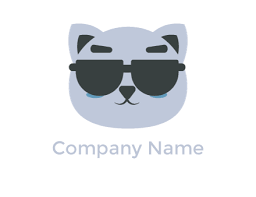

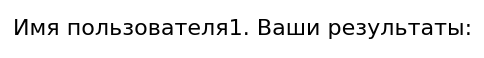

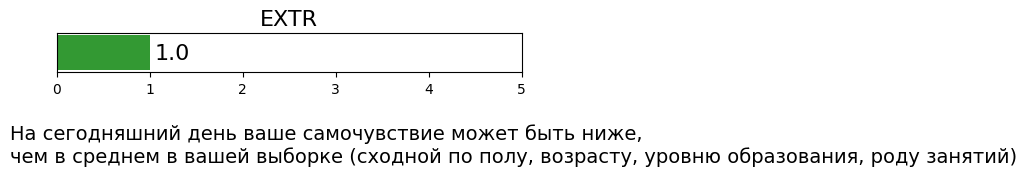

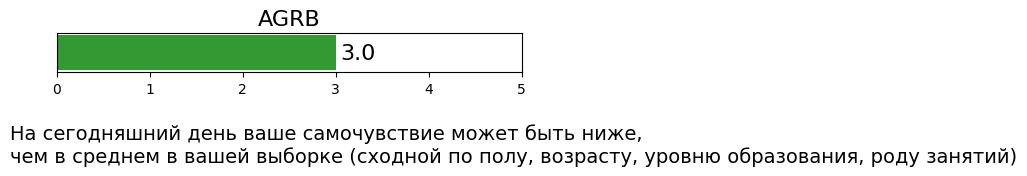

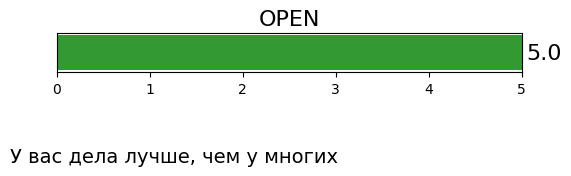

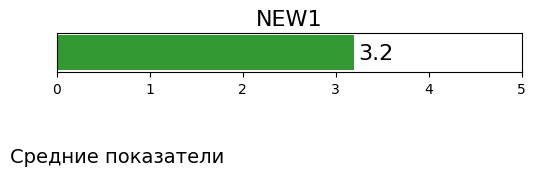

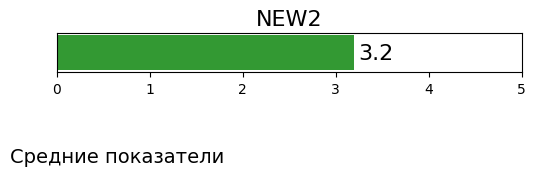

Здравствуйте, Имя пользователя2.
Ваши результаты:



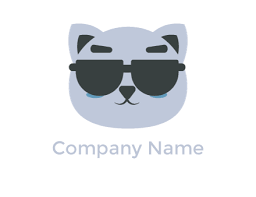

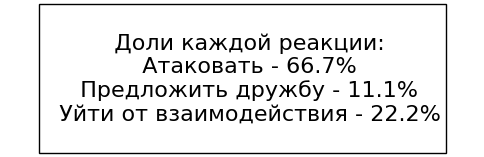

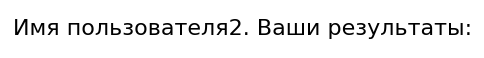

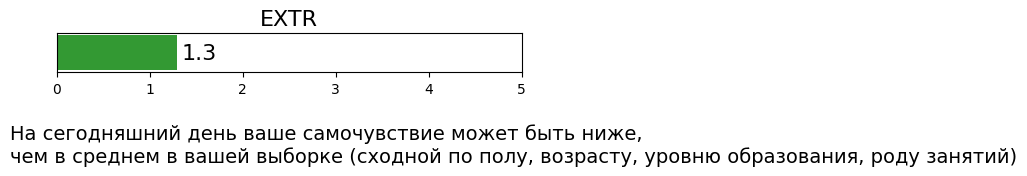

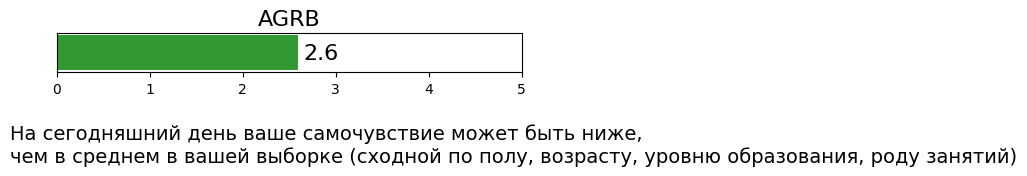

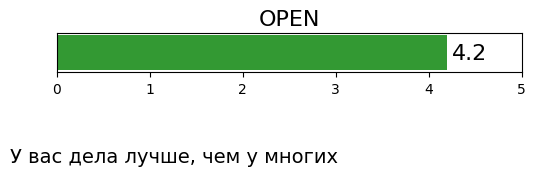

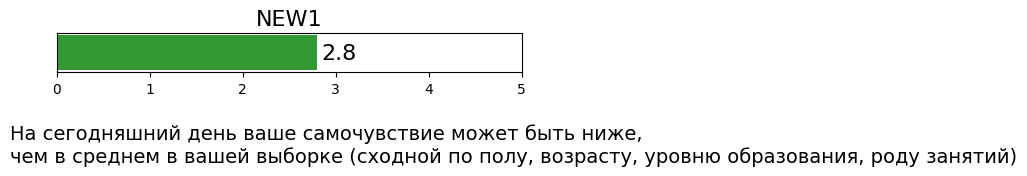

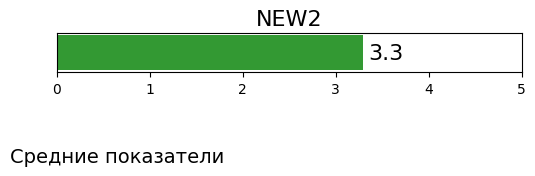

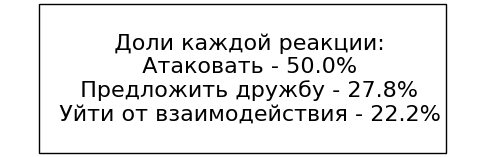

In [15]:
# задаем функцию для создания отчетов
def make_report(df):
    for_report = []
    for index, row in df.iterrows():

      # берем нужные столбцы
      values = row[['user_name',
                    'EXTR', 'AGRB', 'OPEN', 'NEW1', 'NEW2',
                    'text_EXTR', 'text_AGRB', 'text_OPEN', 'text_NEW1', 'text_NEW2',
                    'attack_percent',	'friend_percent',	'avoid_percent']]
      print(f'Здравствуйте, {values[0]}.\nВаши результаты:\n')

      report_to_pdf(values[0],
                    values[1],
                    values[2],
                    values[3],
                    values[4],
                    values[5],
                    values[6],
                    values[7],
                    values[8],
                    values[9],
                    values[10],
                    values[11],
                    values[12],
                    values[13])



# выводим графики и текст
make_report(dataframe)

#time.sleep(2)